In [1]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for some math operations
from sklearn.preprocessing import StandardScaler # for standardizing the data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('/content/0a569366eeec52380b4462b455cacc9a788c2a7883b0a9965d20f0422dfc44df.csv')
df.shape

(5537, 26)

In [3]:
df.columns
df.head()

,time,branch-load-misses,branch-misses,branch-loads,cache-references,branches,ls_dispatch.ld_dispatch,L1-dcache-load-misses,L1-icache-load-misses,ls_dispatch.store_dispatch,...,l2_cache_accesses_from_ic_misses,l1_dtlb_misses,l2_dtlb_misses,l2_cache_accesses_from_dc_misses,dTLB-load-misses,l2_cache_accesses_from_ic_misses_right,l2_cache_accesses_from_dc_misses_right,l2_itlb_misses,ls_l1_d_tlb_miss.all,all_dc_accesses
0,0.010069,639804.0,640372.0,28898147.0,9042446.0,28898862.0,32076034.0,1576873.0,406165.0,17799323.0,...,4109086.0,314734.0,71559.0,1312072.0,71365.0,3562753.0,1417712.0,12066.0,278258.0,46440453.0
1,0.025873,376034.0,376010.0,18580665.0,6068435.0,18580400.0,23124473.0,1088437.0,381667.0,13262124.0,...,6224251.0,485126.0,88656.0,2192135.0,88645.0,4360761.0,1383833.0,10693.0,282570.0,45634035.0
2,0.038010,643545.0,643608.0,25350032.0,11236594.0,25350015.0,28031623.0,2429858.0,620314.0,16134418.0,...,5265707.0,355844.0,95363.0,2432243.0,95408.0,5677050.0,2534860.0,14724.0,385012.0,51328154.0
3,0.048670,324805.0,324829.0,8904803.0,3883045.0,8904855.0,19893116.0,1439129.0,217174.0,10225897.0,...,383246.0,15005.0,4537.0,98324.0,4623.0,2981339.0,836296.0,9522.0,172380.0,22000090.0
4,0.059287,30868.0,30861.0,603404.0,403847.0,603429.0,1085526.0,89197.0,31873.0,644048.0,...,309159.0,11347.0,2588.0,74123.0,2623.0,327239.0,88422.0,1210.0,11897.0,1621182.0


In [4]:
X = df.values # getting all values as matrix of dataframe
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X)

 standardize the features by removing the mean and scaling to unit variance

In [ ]:
X_std

array([[-1.73364938,  0.53078466,  1.12955944,  0.70024363,  0.04433012,
         0.04013853],
       [-1.73352219,  1.37388574,  2.38769512,  1.49289192,  0.6110429 ,
         0.60655283],
       [-1.73341893, -0.08165431, -0.1421549 , -0.15337337, -0.14099781,
        -0.17296146],
       ...,
       [ 1.72989615,  0.86056468,  1.82598214,  1.0850521 ,  0.14167545,
         0.15643147],
       [ 1.7299974 , -0.30978576, -0.4999954 , -0.41412393, -0.1783036 ,
        -0.19308247],
       [ 1.73009829,  4.28565756,  6.77317498,  5.06264995,  1.50861541,
         1.57801109]])

In [ ]:
pca = PCA()
X_pca = pca.fit(X_std)

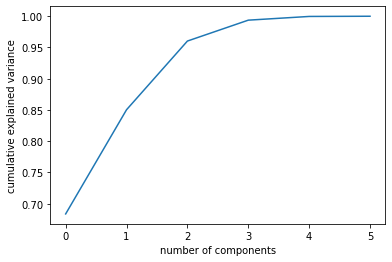

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

the first three components contain approximately
95% of the variance
Which means we can reduce our data dimension
to 3 from 6 without much loss of the data.so we can apply PCA with 4 components to get the reduced dataset.

In [ ]:
num_components = 3
pca = PCA(num_components)
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

In [ ]:
pd.DataFrame(pca.components_, columns = df.columns)

,time,branch-misses,cache-misses,cache-references,branches,instructions
0,-0.021696,0.448078,0.420562,0.471015,0.444832,0.449614
1,0.998053,0.050565,0.023913,0.010652,-0.018980,-0.016979
2,0.045112,-0.182705,-0.606952,-0.258701,0.525711,0.502887


In [ ]:
n_pcs = pca.n_components_ # get number of component

# get the index of the most important feature on EACH component

most_important = [np.abs(pca.components_[i]).argmax() for i in
                  range(n_pcs)]

intial_feature_names = df.columns

# get the most important feature names

most_important_feature_names = [intial_feature_names[most_important[i]]
                               for i in range(n_pcs)]

most_important_feature_names

['cache-references', 'time', 'cache-misses']

PCA for malware dataset

In [5]:
df = pd.read_csv('/content/0a569366eeec52380b4462b455cacc9a788c2a7883b0a9965d20f0422dfc44df.csv')
df.shape

(5537, 26)

In [6]:
df.columns
df.head()

,time,branch-load-misses,branch-misses,branch-loads,cache-references,branches,ls_dispatch.ld_dispatch,L1-dcache-load-misses,L1-icache-load-misses,ls_dispatch.store_dispatch,...,l2_cache_accesses_from_ic_misses,l1_dtlb_misses,l2_dtlb_misses,l2_cache_accesses_from_dc_misses,dTLB-load-misses,l2_cache_accesses_from_ic_misses_right,l2_cache_accesses_from_dc_misses_right,l2_itlb_misses,ls_l1_d_tlb_miss.all,all_dc_accesses
0,0.010069,639804.0,640372.0,28898147.0,9042446.0,28898862.0,32076034.0,1576873.0,406165.0,17799323.0,...,4109086.0,314734.0,71559.0,1312072.0,71365.0,3562753.0,1417712.0,12066.0,278258.0,46440453.0
1,0.025873,376034.0,376010.0,18580665.0,6068435.0,18580400.0,23124473.0,1088437.0,381667.0,13262124.0,...,6224251.0,485126.0,88656.0,2192135.0,88645.0,4360761.0,1383833.0,10693.0,282570.0,45634035.0
2,0.038010,643545.0,643608.0,25350032.0,11236594.0,25350015.0,28031623.0,2429858.0,620314.0,16134418.0,...,5265707.0,355844.0,95363.0,2432243.0,95408.0,5677050.0,2534860.0,14724.0,385012.0,51328154.0
3,0.048670,324805.0,324829.0,8904803.0,3883045.0,8904855.0,19893116.0,1439129.0,217174.0,10225897.0,...,383246.0,15005.0,4537.0,98324.0,4623.0,2981339.0,836296.0,9522.0,172380.0,22000090.0
4,0.059287,30868.0,30861.0,603404.0,403847.0,603429.0,1085526.0,89197.0,31873.0,644048.0,...,309159.0,11347.0,2588.0,74123.0,2623.0,327239.0,88422.0,1210.0,11897.0,1621182.0


In [7]:
df = df.drop(df.columns[0], axis=1)

In [8]:
df.columns
df.head()

,branch-load-misses,branch-misses,branch-loads,cache-references,branches,ls_dispatch.ld_dispatch,L1-dcache-load-misses,L1-icache-load-misses,ls_dispatch.store_dispatch,L1-dcache-loads,...,l2_cache_accesses_from_ic_misses,l1_dtlb_misses,l2_dtlb_misses,l2_cache_accesses_from_dc_misses,dTLB-load-misses,l2_cache_accesses_from_ic_misses_right,l2_cache_accesses_from_dc_misses_right,l2_itlb_misses,ls_l1_d_tlb_miss.all,all_dc_accesses
0,639804.0,640372.0,28898147.0,9042446.0,28898862.0,32076034.0,1576873.0,406165.0,17799323.0,46030673.0,...,4109086.0,314734.0,71559.0,1312072.0,71365.0,3562753.0,1417712.0,12066.0,278258.0,46440453.0
1,376034.0,376010.0,18580665.0,6068435.0,18580400.0,23124473.0,1088437.0,381667.0,13262124.0,33766968.0,...,6224251.0,485126.0,88656.0,2192135.0,88645.0,4360761.0,1383833.0,10693.0,282570.0,45634035.0
2,643545.0,643608.0,25350032.0,11236594.0,25350015.0,28031623.0,2429858.0,620314.0,16134418.0,40454567.0,...,5265707.0,355844.0,95363.0,2432243.0,95408.0,5677050.0,2534860.0,14724.0,385012.0,51328154.0
3,324805.0,324829.0,8904803.0,3883045.0,8904855.0,19893116.0,1439129.0,217174.0,10225897.0,26770163.0,...,383246.0,15005.0,4537.0,98324.0,4623.0,2981339.0,836296.0,9522.0,172380.0,22000090.0
4,30868.0,30861.0,603404.0,403847.0,603429.0,1085526.0,89197.0,31873.0,644048.0,1428785.0,...,309159.0,11347.0,2588.0,74123.0,2623.0,327239.0,88422.0,1210.0,11897.0,1621182.0


In [9]:
X = df.values # getting all values as matrix of dataframe
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X)

In [10]:
X_std


array([[ 2.33804222e+01,  2.33994703e+01,  2.72708882e+01, ...,
         3.52654016e+00,  4.00865042e+00,  4.08390710e+00],
       [ 1.33637160e+01,  1.33613627e+01,  1.73649880e+01, ...,
         3.05720281e+00,  4.07633627e+00,  4.00747794e+00],
       [ 2.35224873e+01,  2.35223446e+01,  2.38643135e+01, ...,
         4.43513351e+00,  5.68437757e+00,  4.54714434e+00],
       ...,
       [-9.84759377e-02, -9.86595403e-02, -1.16903994e-01, ...,
        -5.24870068e-01, -2.69387392e-01, -2.33753471e-01],
       [ 2.71838453e-02,  2.73664354e-02, -8.98375805e-02, ...,
        -1.75858100e-01, -2.25545419e-01, -2.10257054e-01],
       [ 1.10653233e-01,  1.10599017e-01, -5.29540599e-02, ...,
        -4.09672190e-01, -2.36454897e-01, -2.16746942e-01]])

In [11]:
pca = PCA()
X_pca = pca.fit(X_std)

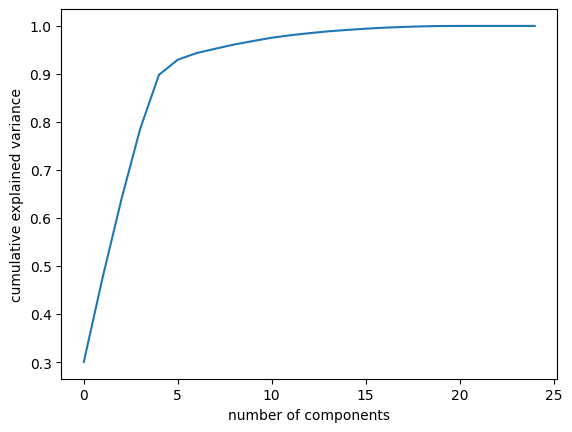

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

5 component create the most related variance 95 percent  out of the 25 events that were available

In [13]:
num_components = 5
pca = PCA(num_components)
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

In [14]:
pd.DataFrame(pca.components_, columns = df.columns)

,branch-load-misses,branch-misses,branch-loads,cache-references,branches,ls_dispatch.ld_dispatch,L1-dcache-load-misses,L1-icache-load-misses,ls_dispatch.store_dispatch,L1-dcache-loads,...,l2_cache_accesses_from_ic_misses,l1_dtlb_misses,l2_dtlb_misses,l2_cache_accesses_from_dc_misses,dTLB-load-misses,l2_cache_accesses_from_ic_misses_right,l2_cache_accesses_from_dc_misses_right,l2_itlb_misses,ls_l1_d_tlb_miss.all,all_dc_accesses
0,0.238388,0.238402,0.243088,0.236710,0.243089,0.182051,0.175287,0.198502,0.189175,0.183283,...,0.280919,0.281044,0.277681,0.244417,0.277822,0.089780,0.093523,0.070603,0.078524,0.069540
1,-0.026718,-0.026719,-0.025681,-0.021983,-0.025679,-0.150670,-0.137481,-0.132090,-0.149690,-0.150676,...,0.002688,0.003469,-0.000986,0.000750,-0.000960,0.437596,0.424633,0.409025,0.437692,0.401824
2,0.011243,0.011236,0.013508,0.004583,0.013508,-0.367519,-0.343216,-0.320892,-0.363999,-0.367273,...,0.138266,0.139970,0.149162,0.143467,0.149191,-0.120336,-0.118433,-0.108225,-0.120279,-0.112731
3,0.361596,0.361593,0.361925,0.354131,0.361924,-0.144014,-0.125511,-0.124102,-0.139278,-0.142909,...,-0.099337,-0.106950,-0.094056,-0.094813,-0.094136,-0.029137,-0.023171,-0.032426,-0.031880,-0.025312
4,-0.111086,-0.111086,-0.106085,-0.092727,-0.106084,-0.047370,-0.038834,-0.027300,-0.045288,-0.046572,...,0.273794,0.293494,0.316314,0.336039,0.315985,-0.026322,-0.023295,-0.033884,-0.029885,-0.022452


In [15]:
n_pcs = pca.n_components_ # get number of component

# get the index of the most important feature on EACH component

most_important = [np.abs(pca.components_[i]).argmax() for i in
                  range(n_pcs)]

intial_feature_names = df.columns

# get the most important feature names

most_important_feature_names = [intial_feature_names[most_important[i]]
                               for i in range(n_pcs)]

most_important_feature_names

['l1_dtlb_misses',
 'ls_l1_d_tlb_miss.all',
 'ls_dispatch.ld_dispatch',
 'branch-loads',
 'iTLB-loads']

Using auto encoder for unsupervised feature selection, : Autoencoders, which are unsupervised neural network models, can be used to reconstruct the input data. By training an autoencoder with different subsets of features, you can compare the reconstruction errors. Features that result in higher reconstruction errors when removed may indicate their importance


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


data = pd.read_csv('/content/0a569366eeec52380b4462b455cacc9a788c2a7883b0a9965d20f0422dfc44df.csv')
data = data.drop(data.columns[0], axis=1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

input_dim = scaled_data.shape[1]

 # Number of neurons in the bottleneck layer
encoding_dim = 5


input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=32, shuffle=True)

# Extract feature importance
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder_model.predict(scaled_data)

# Calculate feature importance based on the weights/activations in the encoded layer
feature_importance = np.mean(encoded_data, axis=0)


top_features_indices = np.argsort(feature_importance)[::-1][:5]
top_features = data.columns[top_features_indices]

print("Top 5 features:")
print(top_features)


Epoch 1/50
174/174 [==============================] - 6s 3ms/step - loss: 0.1930
Epoch 2/50
174/174 [==============================] - 0s 3ms/step - loss: 0.0731
Epoch 3/50
174/174 [==============================] - 1s 3ms/step - loss: 0.0213
Epoch 4/50
174/174 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 5/50
174/174 [==============================] - 1s 3ms/step - loss: 0.0050
Epoch 6/50
174/174 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 7/50
174/174 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 8/50
174/174 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 9/50
174/174 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 10/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 11/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0017
Epoch 12/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0016
Epoch 13/50
174/174 [====

In [17]:
!git clone https://github.com/ajayarunachalam/msda.git

Cloning into 'msda'...
remote: Enumerating objects: 224, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 224 (delta 25), reused 51 (delta 25), pack-reused 173
Receiving objects: 100% (224/224), 8.43 MiB | 2.30 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv('/content/0a569366eeec52380b4462b455cacc9a788c2a7883b0a9965d20f0422dfc44df.csv')
data = data.drop(data.columns[0], axis=1)
# Preprocessing (if needed)
# ...

# Separate features
X = data.values  # Assuming each column represents a variable in the multivariate time series
y = data.values
# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

# Get feature importance scores
importance_scores = rf.feature_importances_

# Rank features based on importance scores
feature_importance = pd.Series(importance_scores, index=data.columns).sort_values(ascending=False)

# Select top 5 features
top_features = feature_importance.index[:5]

print("Top 5 features:")
print(top_features)


Top 5 features:
Index(['all_dc_accesses', 'ls_dc_accesses', 'L1-dcache-loads',
       'ls_dispatch.ld_dispatch', 'ls_dispatch.store_dispatch'],
      dtype='object')


In [19]:
import pandas as pd

# Load the dataset from CSV
data = pd.read_csv('/content/0a569366eeec52380b4462b455cacc9a788c2a7883b0a9965d20f0422dfc44df.csv')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Sort the features based on their correlation with other features
important_features = correlation_matrix.abs().sum().sort_values(ascending=False).index[:5]

# Print the important features
print("Important features:")
for feature in important_features:
    print(feature)


Important features:
l2_cache_accesses_from_ic_misses
l1_dtlb_misses
dTLB-load-misses
l2_dtlb_misses
branches


In [ ]:
# tried the correlation one without the zero columns
import pandas as pd
data = pd.read_csv('/content/mergedgonnacry_modified.csv')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Sort the features based on their correlation with other features
important_features = correlation_matrix.abs().sum().sort_values(ascending=False).index[:5]

# Print the important features
print("Important features:")
for feature in important_features:
    print(feature)

Important features:
amd_iommu_0/mem_dte_hit/
amd_iommu_0/mem_dte_mis/
amd_iommu_0/mem_trans_total/
amd_iommu_0/mem_iommu_tlb_pte_hit/
time


Variance Thresholding,
Compute the variance of each feature in the dataset and select the features with the highest variance. Features with higher variance tend to exhibit greater variability and may provide more information

In [20]:
import pandas as pd



# Load the dataset from CSV
data = pd.read_csv('/content/0a569366eeec52380b4462b455cacc9a788c2a7883b0a9965d20f0422dfc44df.csv')

# Calculate the variance of each feature
variances = data.var()

# Sort the features based on their variance
important_features = variances.sort_values(ascending=False).index[:5]

# Print the important features
print("Important features:")
for feature in important_features:
    print(feature)

Important features:
all_dc_accesses
ls_dc_accesses
L1-dcache-loads
ls_dispatch.ld_dispatch
ls_dispatch.store_dispatch


In [ ]:
!pip install tsfel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.4 MB/s eta 0:00:00


In [ ]:
import tsfel
import pandas as pd

# load dataset
df = pd.read_csv('/content/mergedgonnacry.csv')

# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()

# Extract features
X = tsfel.time_series_features_extractor(cfg, df)

*** Feature extraction started ***
60


<ipython-input-4-2be86d887b8e>:11: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df)



*** Feature extraction finished ***


MSDA method

In [ ]:
!pip install msda

In [ ]:
df = pd.read_csv('/content/mergedgonnacry_modified.csv')
df.shape

(5309, 13)

In [ ]:
df.head()

,time,branches,cache-references,cache-misses,instructions,branch-misses,stalled-cycles-frontend,cpu-cycles,stalled-cycles-backend,amd_iommu_0/mem_dte_hit/,amd_iommu_0/mem_dte_mis/,amd_iommu_0/mem_iommu_tlb_pte_hit/,amd_iommu_0/mem_trans_total/
0,0.010376,10892453.0,7253957.0,2789742.0,49712693.0,410078.0,6898125.0,79101335.0,11608803.0,59.0,1836.0,0.0,2259.0
1,0.022496,36945824.0,9415215.0,3067652.0,158053855.0,421251.0,4086163.0,99510907.0,9369664.0,59.0,1855.0,1886.0,2259.0
2,0.042735,35013205.0,3254598.0,691530.0,143993110.0,68895.0,677037.0,55004983.0,3313310.0,59.0,1855.0,1905.0,2259.0
3,0.054375,34164550.0,6864964.0,2079837.0,146290214.0,290193.0,4641646.0,86999567.0,7959948.0,99.0,2038.0,2123.0,2492.0
4,0.072753,10290964.0,4511683.0,1121688.0,46922890.0,165004.0,5035312.0,47697929.0,12330940.0,99.0,2050.0,2135.0,2492.0


In [ ]:
print("Missing information for whole dataset")
print("Missing by row", df.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row time                                  0
branches                              0
cache-references                      0
cache-misses                          0
instructions                          0
branch-misses                         0
stalled-cycles-frontend               0
cpu-cycles                            0
stalled-cycles-backend                0
amd_iommu_0/mem_dte_hit/              0
amd_iommu_0/mem_dte_mis/              0
amd_iommu_0/mem_iommu_tlb_pte_hit/    0
amd_iommu_0/mem_trans_total/          0
dtype: int64
Missing by col 0       0
1       0
2       0
3       0
4       0
       ..
5304    0
5305    0
5306    0
5307    0
5308    0
Length: 5309, dtype: int64


In [ ]:
print("Trend information for each column in the dataset")
print("Dictionary of each column with variation count\n", df.apply(FeatureSelection.count_trend, axis=0))

Trend information for each column in the dataset
Dictionary of each column with variation count
 time                                     {'Inc': 5308, 'Dec': 0, 'Eql': 0}
branches                              {'Inc': 2785, 'Dec': 2523, 'Eql': 0}
cache-references                      {'Inc': 2817, 'Dec': 2491, 'Eql': 0}
cache-misses                          {'Inc': 2846, 'Dec': 2462, 'Eql': 0}
instructions                          {'Inc': 2743, 'Dec': 2565, 'Eql': 0}
branch-misses                         {'Inc': 2925, 'Dec': 2383, 'Eql': 0}
stalled-cycles-frontend               {'Inc': 2721, 'Dec': 2587, 'Eql': 0}
cpu-cycles                            {'Inc': 2877, 'Dec': 2431, 'Eql': 0}
stalled-cycles-backend                {'Inc': 2624, 'Dec': 2684, 'Eql': 0}
amd_iommu_0/mem_dte_hit/               {'Inc': 144, 'Dec': 0, 'Eql': 5164}
amd_iommu_0/mem_dte_mis/               {'Inc': 582, 'Dec': 0, 'Eql': 4726}
amd_iommu_0/mem_iommu_tlb_pte_hit/     {'Inc': 666, 'Dec': 0, 'Eql': 4642}
amd

In [ ]:
trend=list()
i=0
av=df.to_numpy()
while i!=len(av)-1:
    vg=[]
    for k, v in zip(av[i], av[i+1]):
        if k==v:
            vg.append('Eq')
        elif k>v:
            vg.append('Dec')
        elif k<v:
            vg.append('Inc')
    i+=1
    trend.append(vg)

mat = np.array(trend)
print(mat)

[['Inc' 'Inc' 'Inc' ... 'Inc' 'Inc' 'Eq']
 ['Inc' 'Dec' 'Dec' ... 'Eq' 'Inc' 'Eq']
 ['Inc' 'Dec' 'Inc' ... 'Inc' 'Inc' 'Inc']
 ...
 ['Inc' 'Inc' 'Inc' ... 'Eq' 'Eq' 'Eq']
 ['Inc' 'Inc' 'Inc' ... 'Eq' 'Eq' 'Eq']
 ['Inc' 'Dec' 'Dec' ... 'Eq' 'Eq' 'Eq']]


In [ ]:
# To print Ratios of Variations of Values in each column
cols = list(df.columns)
cols = cols[2:]
print('** Ratios of Variations Of Values of Each Sensor Column wrt other Sensor Column **')
print(' Note: Inc-Increasing ; Dec-Decreasing ; Eq-Equal ')
for i in cols:
    try:
        FeatureSelection.ratio(df,i)
    except ZeroDivisionError:
        print(f"Error: Division by zero encountered for column '{i}'. Skipping calculation.")
        continue
    print('------------------------')


** Ratios of Variations Of Values of Each Sensor Column wrt other Sensor Column **
 Note: Inc-Increasing ; Dec-Decreasing ; Eq-Equal 
[['Inc' 'Inc' 'Inc' ... 'Inc' 'Inc' 'Eq']
 ['Inc' 'Dec' 'Dec' ... 'Eq' 'Inc' 'Eq']
 ['Inc' 'Dec' 'Inc' ... 'Inc' 'Inc' 'Inc']
 ...
 ['Inc' 'Inc' 'Inc' ... 'Eq' 'Eq' 'Eq']
 ['Inc' 'Inc' 'Inc' ... 'Eq' 'Eq' 'Eq']
 ['Inc' 'Dec' 'Dec' ... 'Eq' 'Eq' 'Eq']]
[['Inc' 'Inc' 'Inc' ... 'Inc' 'Inc' 'Eq']
 ['Inc' 'Dec' 'Dec' ... 'Eq' 'Inc' 'Eq']
 ['Inc' 'Dec' 'Inc' ... 'Inc' 'Inc' 'Inc']
 ...
 ['Inc' 'Inc' 'Inc' ... 'Eq' 'Eq' 'Eq']
 ['Inc' 'Inc' 'Inc' ... 'Eq' 'Eq' 'Eq']
 ['Inc' 'Dec' 'Dec' ... 'Eq' 'Eq' 'Eq']]
[['Inc' 'Inc' 'Inc' ... 'Inc' 'Inc' 'Eq']
 ['Inc' 'Dec' 'Dec' ... 'Eq' 'Inc' 'Eq']
 ['Inc' 'Dec' 'Inc' ... 'Inc' 'Inc' 'Inc']
 ...
 ['Inc' 'Inc' 'Inc' ... 'Eq' 'Eq' 'Eq']
 ['Inc' 'Inc' 'Inc' ... 'Eq' 'Eq' 'Eq']
 ['Inc' 'Dec' 'Dec' ... 'Eq' 'Eq' 'Eq']]
[['Inc' 'Inc' 'Inc' ... 'Inc' 'Inc' 'Eq']
 ['Inc' 'Dec' 'Dec' ... 'Eq' 'Inc' 'Eq']
 ['Inc' 'Dec' 'Inc' ... 'In

In [ ]:
change_ovr_time,rate_of_change_ovr_time,growth_decay,rate_growth_decay,(threshold_growth_decay,count_decay_growth) = FeatureSelection.features(df=df, start_sensor_column_index=2)

/usr/local/lib/python3.10/dist-packages/msda/msda.py:271: RuntimeWarning: divide by zero encountered in double_scalars
  vg.append((v-k)/k)


Count of Growth/Decay value for each Sensor Column Values above or below a threshold value:
 {'cache-references': 966, 'cache-misses': 2228, 'instructions': 713, 'branch-misses': 1987, 'stalled-cycles-frontend': 1278, 'cpu-cycles': 850, 'stalled-cycles-backend': 993, 'amd_iommu_0/mem_dte_hit/': 79, 'amd_iommu_0/mem_dte_mis/': 114, 'amd_iommu_0/mem_iommu_tlb_pte_hit/': 1, 'amd_iommu_0/mem_trans_total/': 112}


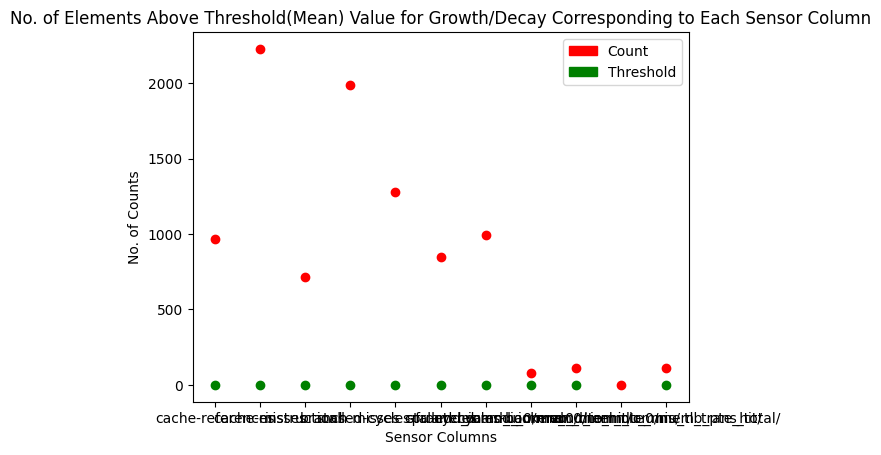

In [ ]:
FeatureSelection.Threshold_Counts(df=df,feature=(threshold_growth_decay,count_decay_growth))

PFA

In [21]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X)
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]


import numpy as np
X = pd.read_csv('/content/0a569366eeec52380b4462b455cacc9a788c2a7883b0a9965d20f0422dfc44df.csv')
column_names = X.columns
pfa = PFA(n_features=5)
pfa.fit(X)

# To get the transformed matrix
X = pfa.features_

# To get the column indices of the kept features
column_indices = pfa.indices_
print(column_indices)
top_features = column_names[column_indices[:5]]
print(top_features)

[11, 2, 3, 16, 22]
Index(['iTLB-loads', 'branch-misses', 'branch-loads',
       'l2_cache_accesses_from_ic_misses',
       'l2_cache_accesses_from_dc_misses_right'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

class PFA(object):
    def __init__(self, n_features, q=None):
        self.q = q
        self.n_features = n_features

    def fit(self, X):
        if not self.q:
            self.q = X.shape[1]

        sc = StandardScaler()
        X = sc.fit_transform(X)

        pca = PCA(n_components=self.q).fit(X)
        A_q = pca.components_.T

        kmeans = KMeans(n_clusters=self.n_features).fit(A_q)
        clusters = kmeans.predict(A_q)
        cluster_centers = kmeans.cluster_centers_

        dists = defaultdict(list)
        for i, c in enumerate(clusters):
            dist = euclidean_distances([A_q[i, :]], [cluster_centers[c, :]])[0][0]
            dists[c].append((i, dist))

        self.indices_ = [sorted(f, key=lambda x: x[1])[0][0] for f in dists.values()]
        self.features_ = X[:, self.indices_]

import numpy as np
import pandas as pd

X = pd.read_csv('/content/mergedgonnacry_modified.csv')
#np.random.random((1000,1000))

pfa = PFA(n_features=5)
pfa.fit(X)

# To get the transformed matrix
X = pfa.features_

# To get the column indices of the kept features
column_indices = pfa.indices_
print(column_indices)
top_features = column_names[column_indices[:5]]
print(top_features)

[2, 3, 6, 9, 12]
Index(['cache-references', 'cache-misses', 'stalled-cycles-frontend',
       'stalled-cycles-backend', 'amd_iommu_0/ign_rd_wr_mmio_1ff8h/'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

pip install principal-feature-analysis

Clustering-based feature selection

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

data = pd.read_csv('/content/0a569366eeec52380b4462b455cacc9a788c2a7883b0a9965d20f0422dfc44df.csv')

X = data.values[:, 1:]
print(X)
feature_names = data.columns[1:]


n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# clustering quality measure (Silhouette coefficient in this example)
# is a function that, given a data set and its partition into clusters,
# returns a non-negative real number representing how strong' or conclusive' the clustering is
silhouette_scores = []
for feature in range(X.shape[1]):
    data = X[:, feature].reshape(-1, 1)
    labels = kmeans.labels_
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

#sort features based on clustering quality measures,
#indicating how well each sample fits its assigned cluster. from high to low
ranking = np.argsort(silhouette_scores)[::-1]

# Step 4: Select top-ranked features
top_k = 5
selected_features = ranking[:top_k]

print("Selected Features:", selected_features)

selected_feature_names = feature_names[selected_features]

print("Selected Features:", selected_feature_names)

[[6.3980400e+05 6.4037200e+05 2.8898147e+07 ... 1.2066000e+04
  2.7825800e+05 4.6440453e+07]
 [3.7603400e+05 3.7601000e+05 1.8580665e+07 ... 1.0693000e+04
  2.8257000e+05 4.5634035e+07]
 [6.4354500e+05 6.4360800e+05 2.5350032e+07 ... 1.4724000e+04
  3.8501200e+05 5.1328154e+07]
 ...
 [2.1534000e+04 2.1529000e+04 3.7241500e+05 ... 2.1400000e+02
  5.7210000e+03 8.8402500e+05]
 [2.4843000e+04 2.4848000e+04 4.0060600e+05 ... 1.2350000e+03
  8.5140000e+03 1.1319400e+06]
 [2.7041000e+04 2.7040000e+04 4.3902200e+05 ... 5.5100000e+02
  7.8190000e+03 1.0634640e+06]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Selected Features: [15  3 20 24  1]
Selected Features: Index(['l2_cache_accesses_from_ic_misses', 'cache-references',
       'l2_cache_accesses_from_ic_misses_right', 'all_dc_accesses',
       'branch-misses'],
      dtype='object')
